In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the hepatitis dataset from a CSV file
df = pd.read_csv('hepatitis_csv.csv')

# Display the proportion of missing values in each column
print("Proportion of missing values in each column:")
print(df.isnull().mean())

# Drop the columns that aren’t useful
df = df.drop(columns=['protime'])

# Create a new DataFrame 'dfnew' by dropping rows with missing values
dfnew = df.dropna()

# Create dummy variables for categorical columns: 'sex', 'steroid', 'fatigue'
dfdummies = pd.get_dummies(df, columns=['sex', 'steroid', 'fatigue'])

# Fill missing values with 'Missing'
dfna = df.fillna('Missing')

# Convert the DataFrame to a NumPy array
numpy_arr = df.values

# Separate features 'x' and target 'y' from the DataFrame
x = df['albumin']
y = df['age']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

# Display the training and test data splits
print("Training data (x_train, y_train):")
print(x_train, y_train)
print("Test data (x_test, y_test):")
print(x_test, y_test)


Proportion of missing values in each column:
age                0.000000
sex                0.000000
steroid            0.006452
antivirals         0.000000
fatigue            0.006452
malaise            0.006452
anorexia           0.006452
liver_big          0.064516
liver_firm         0.070968
spleen_palpable    0.032258
spiders            0.032258
ascites            0.032258
varices            0.032258
bilirubin          0.038710
alk_phosphate      0.187097
sgot               0.025806
albumin            0.103226
protime            0.432258
histology          0.000000
class              0.000000
dtype: float64
Training data (x_train, y_train):
77     4.0
17     4.0
79     4.9
98     4.2
91     3.3
      ... 
129    3.3
152    4.1
145    4.2
87     2.8
131    2.2
Name: albumin, Length: 124, dtype: float64 77     34
17     40
79     28
98     47
91     42
       ..
129    57
152    61
145    31
87     30
131    31
Name: age, Length: 124, dtype: int64
Test data (x_test, y_test):
48     

Intercept (B0): 21.157678085579494
Slope (B1): [0.09721967]
RMSE value: 12.385641692256364


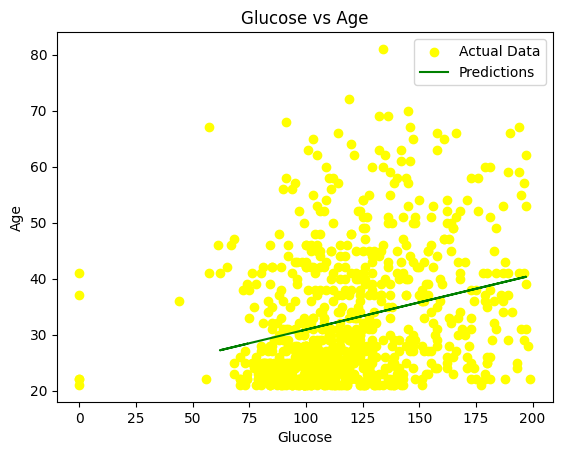

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset from a CSV file
df = pd.read_csv('diabetes_csv.csv')

# Prepare the data
x = df['Glucose'].values.reshape(-1, 1)
y = df['Age']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Get the intercept and slope of the regression line
intercept = lr.intercept_
slope = lr.coef_

print("Intercept (B0):", intercept)
print("Slope (B1):", slope)

# Make predictions on the test data
y_pred = lr.predict(x_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE value:", rmse)

# Plot the actual data and predicted line
plt.scatter(x, y, color='yellow', label='Actual Data')
plt.plot(x_test, y_pred, color='green', label='Predictions')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title('Glucose vs Age')
plt.legend()
plt.show()

# Select columns used in the analysis
used_columns = ['Glucose', 'Age']
used_df = df[used_columns]

# Save the selected columns to a new CSV file
used_df.to_csv('result.csv', index=False)
